##### Read results and delete NaN rows

In [1]:
import pandas as pd
results = pd.read_csv(r"D:\football-data.co.uk\Premier League\2001\E0.csv", usecols=["Div","Date","HomeTeam","AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HST","AST"], low_memory=False)
results = results[results.Div.notnull()]
results.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HST,AST
0,E0,19/08/00,Charlton,Man City,4,0,H,2,0,H,14,4
1,E0,19/08/00,Chelsea,West Ham,4,2,H,1,0,H,10,5
2,E0,19/08/00,Coventry,Middlesbrough,1,3,A,1,1,D,3,9
3,E0,19/08/00,Derby,Southampton,2,2,D,1,2,A,4,6
4,E0,19/08/00,Leeds,Everton,2,0,H,2,0,H,8,6


##### Calculate goal differences

In [2]:
goalDiffs = pd.concat([results["Date"],results["HomeTeam"],results["AwayTeam"],results["FTHG"]-results["FTAG"],results["FTR"],results["HTHG"]-results["HTAG"]], axis=1)
goalDiffs.rename(columns = {0 : "FTGD", 1 : "HTGD"}, inplace=True)
goalDiffs.head()

,Date,HomeTeam,AwayTeam,FTGD,FTR,HTGD
0,19/08/00,Charlton,Man City,4,H,2
1,19/08/00,Chelsea,West Ham,2,H,1
2,19/08/00,Coventry,Middlesbrough,-2,A,0
3,19/08/00,Derby,Southampton,0,D,-1
4,19/08/00,Leeds,Everton,2,H,2


##### Query halftime and fulltime goal differences only of unique pairs
The groupby with size creates an index on the grouped columns. The index must be removed, so the result can be treated like a flat dataframe again.

In [3]:
import matplotlib.pyplot as plt
uniqueGoalDiffs = pd.concat([goalDiffs["HTGD"],goalDiffs["FTGD"]], axis=1).groupby(["HTGD","FTGD"]).size().reset_index()
uniqueGoalDiffs = pd.concat([uniqueGoalDiffs["HTGD"],uniqueGoalDiffs["FTGD"]], axis=1)
uniqueGoalDiffs.head()

,HTGD,FTGD
0,-4,-4
1,-3,-2
2,-2,-3
3,-2,-2
4,-2,-1


##### Plot halftime and fulltime goal differences only of unique pairs

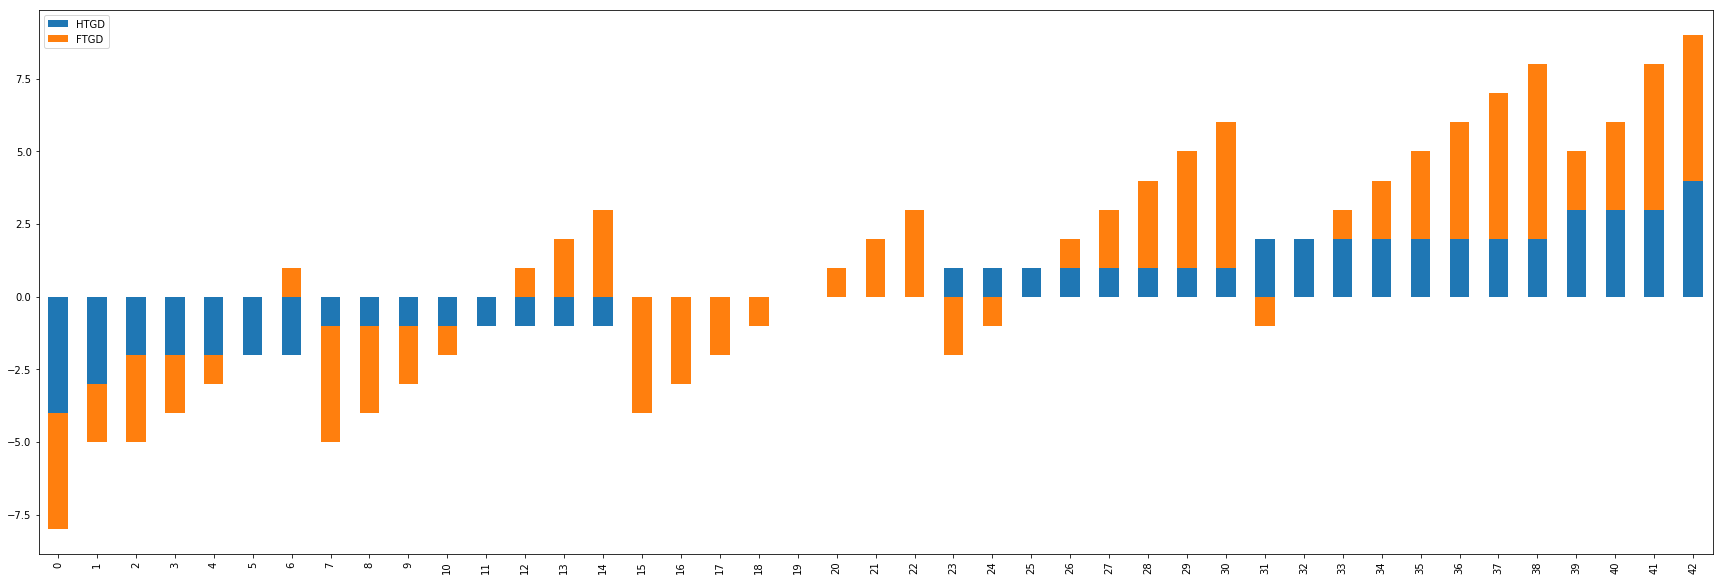

In [4]:
plt.rcParams["figure.figsize"] = (30, 10)
uniqueGoalDiffs.plot.bar(stacked=True)
plt.show()

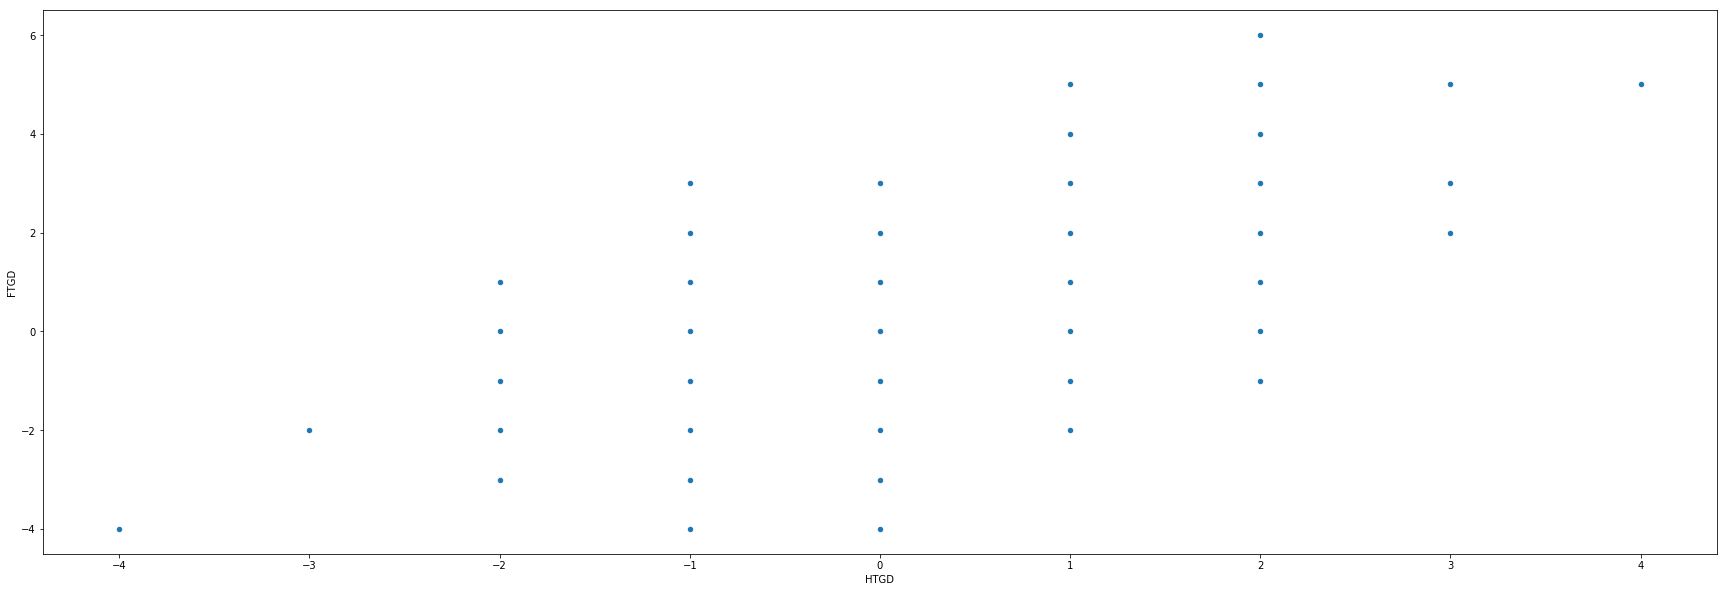

In [5]:
uniqueGoalDiffs.plot.scatter(x = "HTGD", y = "FTGD")
plt.show()

##### Analyze only home team goals using shots on target

In [6]:
homeTeamGoals = pd.concat([results["Date"],results["HomeTeam"],results["FTHG"],results["HST"]],axis=1)
homeTeamGoals.head()

,Date,HomeTeam,FTHG,HST
0,19/08/00,Charlton,4,14
1,19/08/00,Chelsea,4,10
2,19/08/00,Coventry,1,3
3,19/08/00,Derby,2,4
4,19/08/00,Leeds,2,8


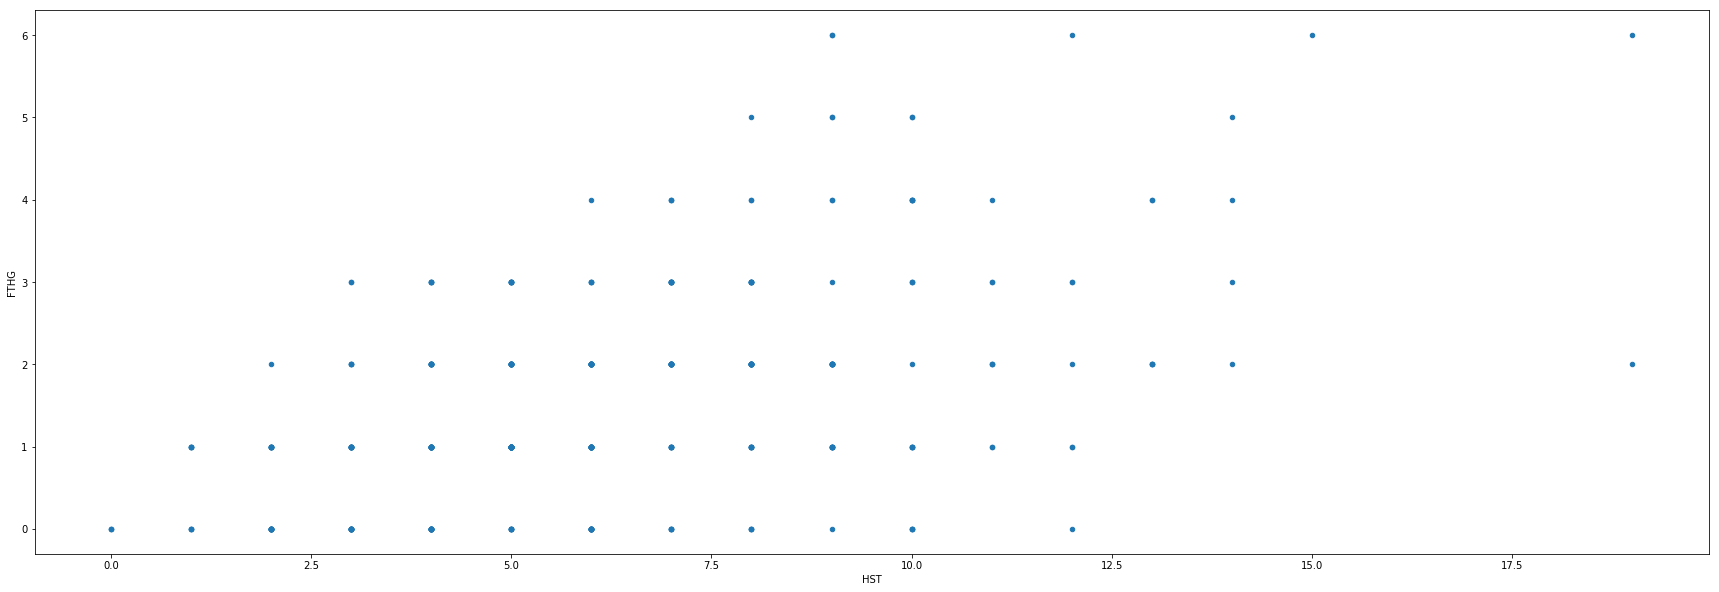

In [7]:
homeTeamGoals.plot.scatter(x = "HST", y = "FTHG")
plt.show()

In [8]:
homeTeamGoals.describe()

,FTHG,HST
count,380.000000,380.000000
mean,1.544737,6.163158
std,1.285436,2.991582
min,0.000000,0.000000
25%,1.000000,4.000000
50%,1.000000,6.000000
75%,2.000000,8.000000
max,6.000000,19.000000


##### Visualize correlation between goals and shots on target using seaborn heatmap
* bis 0,2 => sehr geringe Korrelation
* bis 0,5 => geringe Korrelation
* bis 0,7 => mittlere Korrelation
* bis 0,9 => hohe Korrelation
* über 0,9 => sehr hohe Korrelation

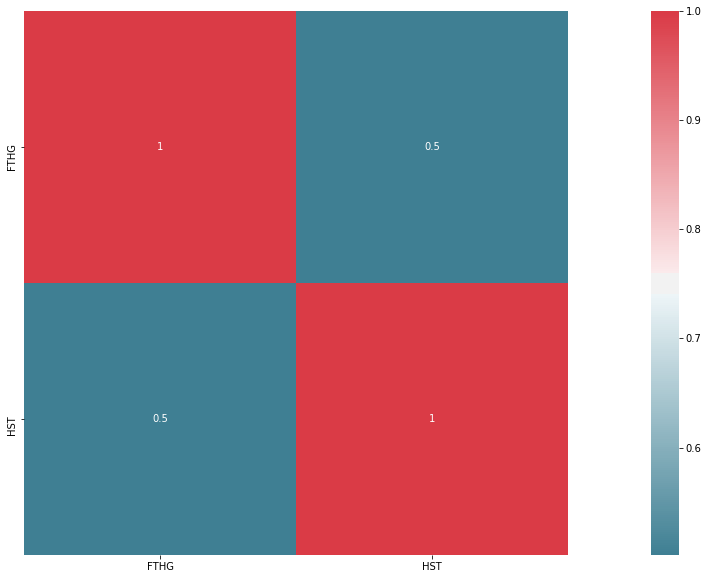

In [9]:
import seaborn as sns
shotsWithGoalsCorrelation = homeTeamGoals.corr()
colorMap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(shotsWithGoalsCorrelation, square=True, cmap=colorMap, annot=True)

##### Analyze only home team goals using half time goals

In [10]:
homeTeamGoals = pd.concat([results["Date"],results["HomeTeam"],results["FTHG"],results["HTHG"]],axis=1)
homeTeamGoals.head()

,Date,HomeTeam,FTHG,HTHG
0,19/08/00,Charlton,4,2
1,19/08/00,Chelsea,4,1
2,19/08/00,Coventry,1,1
3,19/08/00,Derby,2,1
4,19/08/00,Leeds,2,2


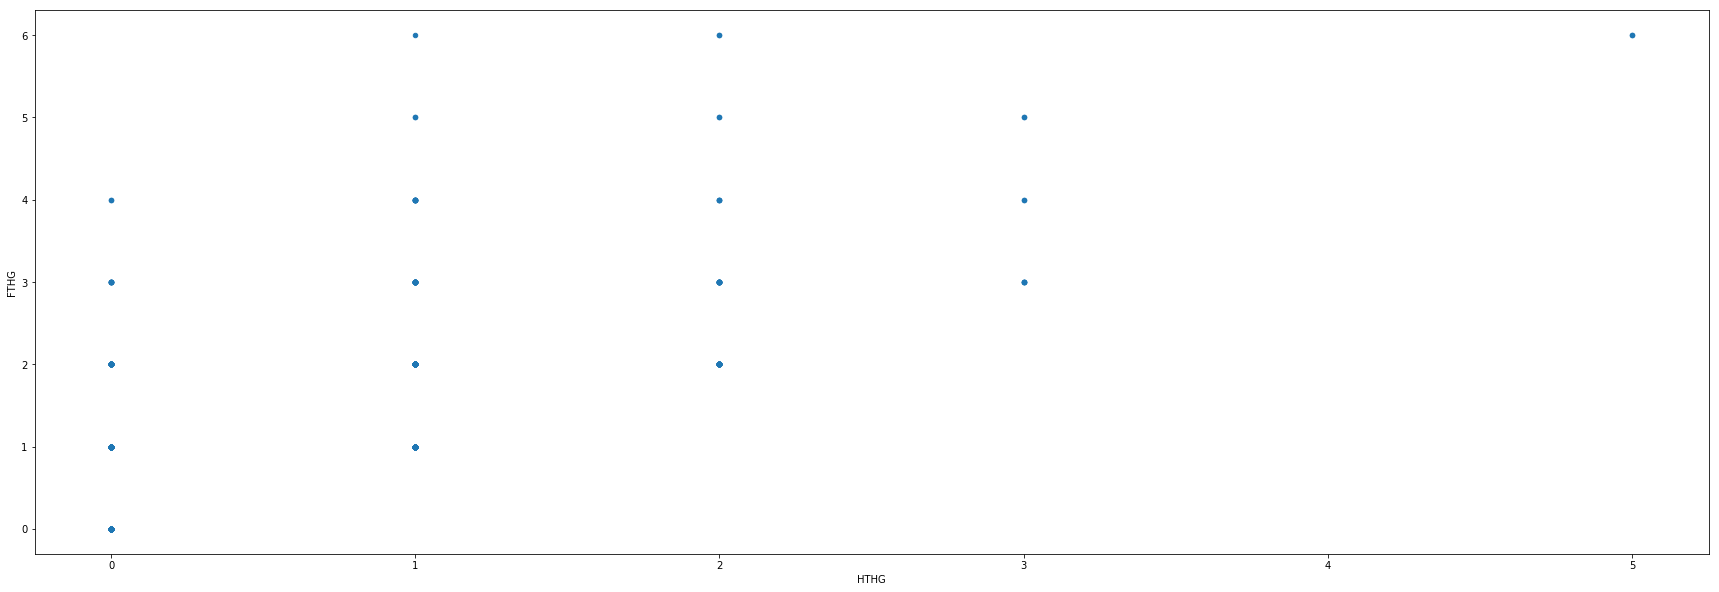

In [11]:
homeTeamGoals.plot.scatter(x = "HTHG", y = "FTHG")
plt.show()

In [12]:
homeTeamGoals.describe()

,FTHG,HTHG
count,380.000000,380.000000
mean,1.544737,0.686842
std,1.285436,0.843623
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,1.000000
max,6.000000,5.000000


##### Visualize correlation between full time goals and half time goals using seaborn heatmap

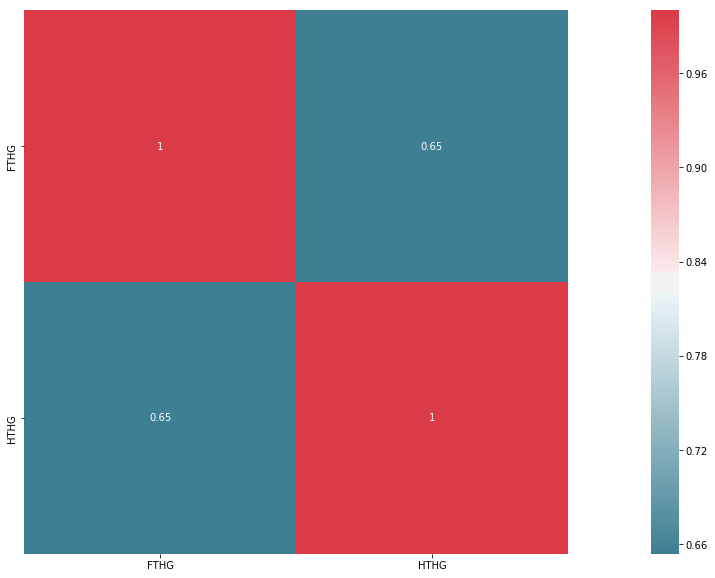

In [13]:
halfTimeWithFullTimeGoalsCorrelation = homeTeamGoals.corr()
colorMap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(halfTimeWithFullTimeGoalsCorrelation, square=True, cmap=colorMap, annot=True)